In [0]:
!pip install tensorflow
!pip install keras


From samples images of hand written digits fro 0 - 9
We will determine the number using CNN

lets begin with importing libraries


In [0]:
from keras.datasets import mnist #to get digits data
import numpy as np #for data manipulation
import matplotlib.pyplot as plt #for plotting
import time #to check import time CPU vs GPU vs TPU

In [0]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()


In [44]:
#we have 60,000 image samples to train from 
x_train.shape[0]

60000

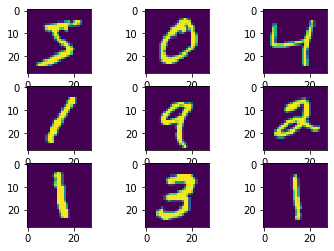

In [45]:
#a sample of how each images look
for i in range(9):

  plt.subplot(330 + 1 + i)
  plt.imshow(x_train[i])
plt.show()

In [0]:
from keras.models import Sequential #sequential models for feedforward NN
from keras.layers import Conv2D, Dense, Flatten, MaxPool2D, Dropout
from keras.utils import to_categorical #since we are solving a classification problem
from keras.callbacks import EarlyStopping #to stop training once the validation accuracy stops improving, this saves resurce and time

In [0]:
#lets create an instance of sequential models

model = Sequential()


In [0]:
#lets reshape our data to 28 x 28 pixels per image 
x_train = x_train.reshape(x_train.shape[0], 28,28,1)
x_test = x_test.reshape(x_test.shape[0], 28,28,1)

#converting the labels into categorical values
y_train = to_categorical(y_train)

In [49]:
x_train.shape

(60000, 28, 28, 1)

lets add convolutional layer to our model along with other hyperparameters like 

1.   Number of hidden layers
2.   Kernel size
3.   Input shape of our training data
4.   Activation function (we shall use **Relu**)



In [0]:
model.add(Conv2D(10, kernel_size=3,input_shape=(28,28,1), activation='relu'))

In [0]:
#lets add pooling layer to reduce the size of the input image by extracting on the brightest pixel
model.add(MaxPool2D(2,2))

In [0]:
#dropout layer to avoid overfitting
model.add(Dropout(0.5))

In [0]:
#add flatten layer to convert each feature data to single column
model.add(Flatten())

In [0]:
#lets add the final mandatory layer with 10 neurons and activation function as softmax which gives the probability of each class
model.add(Dense(10, activation='softmax'))

In [55]:
#lets check how our model looks
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 10)        100       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 10)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 13, 13, 10)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 1690)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                16910     
Total params: 17,010
Trainable params: 17,010
Non-trainable params: 0
_________________________________________________________________


In [0]:
#lets compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [57]:
#training the model with 10 epochs, implementing early stopping, with batch size 128, and validation set of 30 percent
start_time = time.time()
model_v1 = model.fit(x_train, y_train, validation_split=0.3, batch_size=128, epochs=10, callbacks=[EarlyStopping(patience=3)]) 

#checking for time
end_time = time.time()
total_time = end_time - start_time

Train on 42000 samples, validate on 18000 samples
Epoch 1/10
42000/42000 [==============================] - 2s 46us/step - loss: 6.8720 - acc: 0.5614 - val_loss: 3.2733 - val_acc: 0.7889
Epoch 2/10
42000/42000 [==============================] - 2s 38us/step - loss: 3.4907 - acc: 0.7748 - val_loss: 2.7923 - val_acc: 0.8198
Epoch 3/10
42000/42000 [==============================] - 2s 36us/step - loss: 3.0106 - acc: 0.8050 - val_loss: 2.4794 - val_acc: 0.8404
Epoch 4/10
42000/42000 [==============================] - 2s 36us/step - loss: 1.9573 - acc: 0.8664 - val_loss: 1.1068 - val_acc: 0.9231
Epoch 5/10
42000/42000 [==============================] - 2s 36us/step - loss: 1.4254 - acc: 0.8988 - val_loss: 0.8320 - val_acc: 0.9393
Epoch 6/10
42000/42000 [==============================] - 2s 37us/step - loss: 1.1848 - acc: 0.9142 - val_loss: 0.7475 - val_acc: 0.9451
Epoch 7/10
42000/42000 [==============================] - 2s 37us/step - loss: 1.0294 - acc: 0.9228 - val_loss: 0.6368 - val_acc

GPU performs the fatstest, to prove this I ran a test on CPU vs GPU vs TPU and timed the total training time and listed the results below, GPU performs almost 10x faster than CPU and TPU 

*   Total time on CPU = 118 seconds
*   Total time on GPU = 20 seconds
*   Total time on TPU = 121 seconds




In [58]:
model_history.history.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

Text(0, 0.5, 'Accuracy score in percentage')

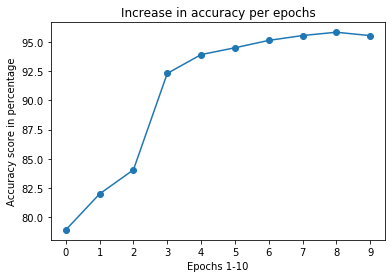

In [76]:
#lets plot our performances
# increase in accuracy per epoc

plt.plot(np.array(model_v1.history['val_acc']) *100, marker='o')
plt.title('Increase in accuracy per epochs')
plt.xticks(np.arange(0,10))
plt.xlabel('Epochs 1-10')
plt.ylabel('Accuracy score in percentage')

## Our models accuracy is 96%


Text(0.5, 1.0, 'Validation loss per epoch')

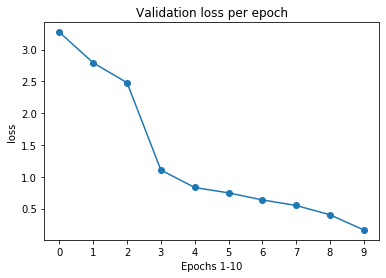

In [78]:
#decrease on loss per epochs

plt.plot(model_v1.history['val_loss'], marker='o')
plt.xlabel('Epochs 1-10')
plt.xticks(np.arange(0,10))
plt.ylabel('loss')
plt.title('Validation loss per epoch')